In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout


In [2]:
dataset=pd.read_csv('D:\Sandesh\Data Science\Deep Learning\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset[dataset.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
del X['Geography']

In [9]:
del X['Gender']

In [10]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
# Splitting the Data into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
# Sequential - For Doing forward and backward propogation.
# Dense - For creating neuron in hidden layer, input and output layers.

# Initialize the ANN
classifier=Sequential()

In [14]:
# adding the input layers
classifier.add(Dense(units=11,activation='relu'))

# adding the first hidden layers
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

# adding the second hidden layers
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

# adding the output layers
classifier.add(Dense(units=1,activation='sigmoid'))



In [15]:
# if we have to specify the learning rate harded code
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [16]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')


In [17]:
# Early stopping means when the accuracy is stagged , not getting increased after certain epochs then we can do early stopping.

import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [19]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stop)


Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8427 - val_loss: 0.3353 - val_accuracy: 0.8565
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8350 - val_loss: 0.3432 - val_accuracy: 0.8694
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8425 - val_loss: 0.3376 - val_accuracy: 0.8686
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3614 - accuracy: 0.8416 - val_loss: 0.3461 - val_accuracy: 0.8448
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3681 - accuracy: 0.8380 - val_loss: 0.3371 - val_accuracy: 0.8679
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8403 - val_loss: 0.3374 - val_accuracy: 0.8663
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3570 - accuracy: 0.8436 - val_loss: 0.3318 - val_accuracy: 0.8675

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

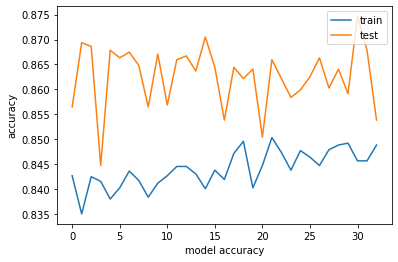

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

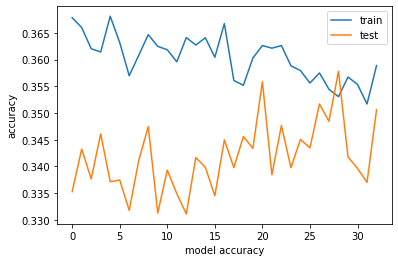

In [22]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [23]:
# predicting the test set results

y_pred=classifier.predict(X_test)
y_pred=(y_pred >=0.5)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1604   19]
 [ 265  112]]
0.858


In [25]:
# To check weights of every layers

classifier.get_weights()

[array([[ 0.7246608 ,  0.08057937, -0.6470456 , -0.0328508 , -0.9103332 ,
          1.9642937 , -0.42954525,  0.11434638,  1.3866404 ,  0.44062686,
          0.02888257],
        [-1.328744  , -4.508901  , -2.9990487 , -3.95546   , -2.9833694 ,
          0.56584615,  3.83996   ,  0.07083742, -1.1980699 , -1.3283182 ,
          2.940231  ],
        [-0.04650979, -1.2402186 ,  1.8746582 , -0.09433623, -1.1523527 ,
         -1.0157249 , -0.21742055,  0.11337125,  1.7733608 ,  0.62988734,
         -0.09136227],
        [ 2.530175  , -2.5505035 , -3.8520112 , -0.26677638,  0.43292528,
         -1.8532048 ,  0.9286049 , -3.9091167 , -0.12600721,  0.03140241,
         -0.7611341 ],
        [-0.6634453 ,  0.87276477,  0.50047964, -0.92797273,  0.62198776,
          1.1374956 , -0.676741  , -4.9101586 ,  1.0273606 ,  4.6195264 ,
         -0.09179956],
        [ 0.28782964, -1.3064073 ,  0.39942107,  0.70305246, -0.35092008,
          1.593814  ,  0.22520265, -0.30582142,  0.890084  , -0.2141196